In [1]:
import numpy as np
from hamiltonian import hamiltonian
from super_cell import super_cell
from k_space import k_space
from observables import observables
from observables import z2_wcc
import matplotlib.pyplot as plt
from copy import deepcopy

# Import primitive bulk Hamiltonian

In [2]:
bra_vec   = np.array([[ 4.6410098,    0.0000000,    0.0000000],
                      [-2.3205054,    4.0192321,    0.0000000],
                      [ 0.0000000,    0.0000000,   40.0000000]])
spin      = True
basis     = np.array([0])
n_elec    = 2
ef        = -3.43705460
inputfile = "../../test_ham/stanene_pz_hr.dat"
Ham_bulk = hamiltonian(inputfile,bra_vec,spin,basis,ef,N_ELEC=n_elec)

Reading Hamiltonian...
Time for reading hr-file:  0.0414888858795166
Hamiltonian from file ../../test_ham/stanene_pz_hr.dat successfully loaded.
H(R) is spin-full and contains 67 R-vectors and 2 orbitals.


# Bulk band structure
## k-path

In [3]:
ktype     = "path"
kbasis    = "red"
vecs      = np.array([[   0, 1/2, 0],
                      [ 1/3, 1/3, 0],
                      [   0,   0, 0],
                      [-1/3,-1/3, 0],
                      [-1/2,   0, 0]])

npoints   = 1000
K_space_bulk = k_space(ktype,kbasis,vecs,Ham_bulk.bra_vec,npoints)

## calculation

In [4]:
op_types = ["S","sub_latt"]
op_types_k = ["Orb_SOC_inv","BC"]
observables_bulk = observables(Ham_bulk,K_space_bulk,op_types,op_types_k,PREFIX="bulk_")
###Fill empty operaror sub_latt
#print(observables_bulk.ops["S"].op)
op_sub_latt = np.zeros((3,4,4))
op_sub_latt[0] = np.diag((1,0,1,0)) 
op_sub_latt[1] = np.diag((0,1,0,1))
op_sub_latt[2] = np.diag((1,0,1,0)) - np.diag((0,1,0,1))
observables_bulk.ops["sub_latt"].op = op_sub_latt
observables_bulk.calculate_ops()
observables_bulk.__dict__.keys()
observables_bulk.ops["S"].__dict__.keys()
#observables_bulk.ops["S"].val

Initializing k-independent operator S.
Initializing k-independent operator sub_latt.
Creating empty operator "sub_latt".
Inititalizing k-dependent operator Orb_SOC_inv.
Inititalizing k-dependent operator BC.
Calculating operators on the given k-space...
Diagonalizing all k-points in parallel.
Time for running H(k) FT: 0.01645803451538086
Time for diagonalizing H(k): 0.013813972473144531
Time for calculating expectation value of operator S: 0.003693819046020508
Time for calculating expectation value of operator sub_latt: 0.00419306755065918
Time for calculating expectation value of operator Orb_SOC_inv: 0.3550601005554199
Time for calculating expectation value of operator BC: 0.06545186042785645
Shifting eigenvalues by Fermi level...
Running post-processing for operator S.
Running post-processing for operator sub_latt.
No post-processing.
Running post-processing for operator Orb_SOC_inv.
No post-processing.
Running post-processing for operator BC.
Writing eigenvalues output.
Writing out

dict_keys(['op_type', 'ham', 'f_spec', 'prec', 'val_k_int', 'post', 'val_b_int', 'val', 'op', 'expval'])

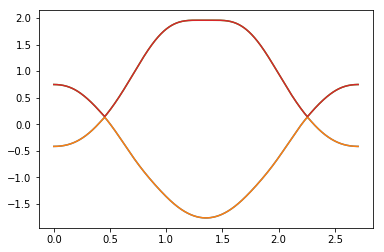

In [5]:
plt.plot(observables_bulk.k_space.k_dist,observables_bulk.evals)
plt.show()

# Adding a Semenoff mass - trivial Hamiltonian

In [6]:
Ham_bulk_sem = deepcopy(Ham_bulk)
m = 0.102
semenoff_mass = m*np.diag((1,-1,1,-1))
R=[0,0,0]
Ham_bulk_sem.mod_H_R(R,semenoff_mass)
Ham_bulk.get_H_R(R)
print("")
Ham_bulk_sem.get_H_R(R)
print("")

-3.265 0.000 -0.658-0.000 -0.000 0.000  0.000-0.000 
-0.658 0.000 -3.265 0.000  0.000 0.000  0.000-0.000 
-0.000 0.000  0.000-0.000 -3.265 0.000 -0.658-0.000 
 0.000 0.000  0.000 0.000 -0.658 0.000 -3.265 0.000 

-3.163 0.000 -0.658-0.000 -0.000 0.000  0.000-0.000 
-0.658 0.000 -3.367 0.000  0.000 0.000  0.000-0.000 
-0.000 0.000  0.000-0.000 -3.163 0.000 -0.658-0.000 
 0.000 0.000  0.000 0.000 -0.658 0.000 -3.367 0.000 



In [7]:
observables_bulk_sem = observables(Ham_bulk_sem,K_space_bulk,op_types,op_types_k,PREFIX="bulk_sem_")
observables_bulk_sem.ops["sub_latt"].op = op_sub_latt
observables_bulk_sem.calculate_ops()


Initializing k-independent operator S.
Initializing k-independent operator sub_latt.
Creating empty operator "sub_latt".
Inititalizing k-dependent operator Orb_SOC_inv.
Inititalizing k-dependent operator BC.
Calculating operators on the given k-space...
Diagonalizing all k-points in parallel.
Time for running H(k) FT: 0.023771047592163086
Time for diagonalizing H(k): 0.02336907386779785
Time for calculating expectation value of operator S: 0.006371021270751953
Time for calculating expectation value of operator sub_latt: 0.006190776824951172
Time for calculating expectation value of operator Orb_SOC_inv: 0.34701108932495117
Time for calculating expectation value of operator BC: 0.04239702224731445
Shifting eigenvalues by Fermi level...
Running post-processing for operator S.
Running post-processing for operator sub_latt.
No post-processing.
Running post-processing for operator Orb_SOC_inv.
No post-processing.
Running post-processing for operator BC.
Writing eigenvalues output.
Writing o

# $Z_2$-invariant, WCC calculation

## Bulk Hamiltonian

Calculating Z_2 invariant for Gamma-plane...
Jump at pump:69
Z_2=1
Calculating Z_2 invariant for BZ-surface plane...
Jump at pump:69
Z_2=1


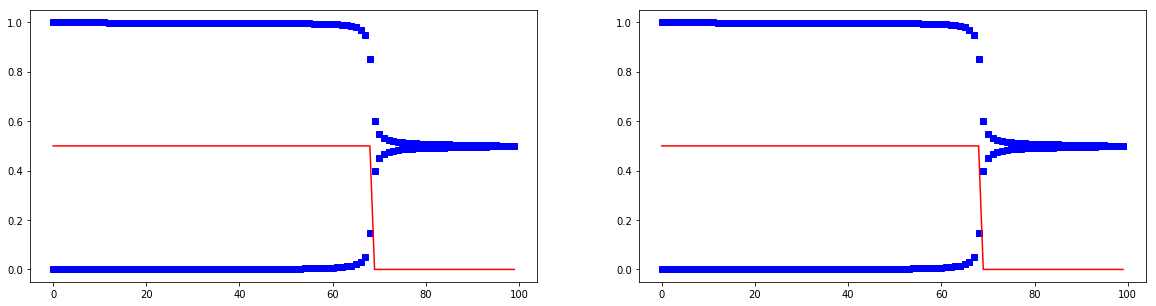

In [8]:
n_pump = np.array([100,10])
normal = 3
z2 = z2_wcc(Ham_bulk,n_pump,normal)
z2.plot_wcc()

## Influence of Semenoff mass

Calculating Z_2 invariant for Gamma-plane...
Z_2=0
Calculating Z_2 invariant for BZ-surface plane...
Z_2=0


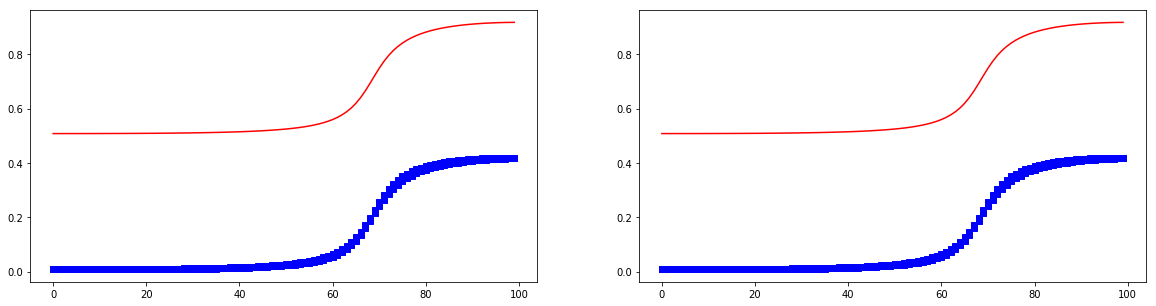

In [9]:
n_pump = np.array([100,10])
normal = 3
z2_sem = z2_wcc(Ham_bulk_sem,n_pump,normal)
z2_sem.plot_wcc()

## Create super-cell

In [10]:
sup_vec = np.array([[ 1, 0, 0],
                    [ 1, 2, 0],
                    [ 0, 0, 1]])
Ham_super_cell = super_cell(Ham_bulk,sup_vec)

# Test k-path

In [11]:
ktype     = "self-defined"
kbasis    = "car"
K_space_sup = k_space(ktype,kbasis,K_space_bulk.k_space_car,Ham_super_cell.bra_vec,npoints)

# Test band structure

In [12]:
# Initializing observables
op_types = ["S"]
Observables_sup_cell = observables(Ham_super_cell,K_space_sup,op_types,PREFIX="sup_")
Observables_sup_cell.calculate_ops()

Initializing k-independent operator S.
Calculating operators on the given k-space...
Diagonalizing all k-points in parallel.
Hamiltonian is hermitian?: True
Time for running H(k) FT: 0.03210306167602539
Time for diagonalizing H(k): 0.0652458667755127
Time for calculating expectation value of operator S: 0.01879715919494629
Shifting eigenvalues by Fermi level...
Running post-processing for operator S.
Writing eigenvalues output.
Writing output for operator S.


# Slab calculation, PBC along $x$

In [13]:
N_slab = 15
sup_vec = np.array([[ 1, 0, 0],
                    [ 1, 2, 0],
                    [ 0, 0, 1]])
sup_vec[1] *= N_slab
Ham_slab_x = super_cell(Ham_bulk,sup_vec,1)
Ham_slab_x.bra_vec

array([[ 4.64100980e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.50000000e-05,  1.20576963e+02,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  4.00000000e+01]])

In [14]:
ktype     = "path"
kbasis    = "red"
vecs      = np.array([[ -1, 0, 0],
                      [  1, 0, 0]])

npoints   = 500

K_space_slab_x      = k_space(ktype,kbasis,vecs,Ham_slab_x.bra_vec,npoints)

In [15]:
op_types = ["S"]
op_types_k = ["BC"]
Observables_slab_x = observables(Ham_slab_x,K_space_slab_x,op_types,op_types_k,PREFIX="slab_x_")
Observables_slab_x.calculate_ops()

Initializing k-independent operator S.
Inititalizing k-dependent operator BC.
Calculating operators on the given k-space...
Diagonalizing all k-points in parallel.
Hamiltonian is hermitian?: True
Time for running H(k) FT: 0.4139859676361084
Time for diagonalizing H(k): 1.216796875
Time for calculating expectation value of operator S: 0.7117090225219727
Time for calculating expectation value of operator BC: 21.4768009185791
Shifting eigenvalues by Fermi level...
Running post-processing for operator S.
Running post-processing for operator BC.
Writing eigenvalues output.
Writing output for operator S.
Writing output for operator BC.
Writing band-integrated output for operator BC.
